In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv',encoding='ISO-8859-1')

In [3]:
#Checking first five rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#checking data shape
data.shape

(541909, 8)

In [5]:
#Checking data size
data.size

4335272

In [6]:
#Checking column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.columns=data.columns.str.lower()
data.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

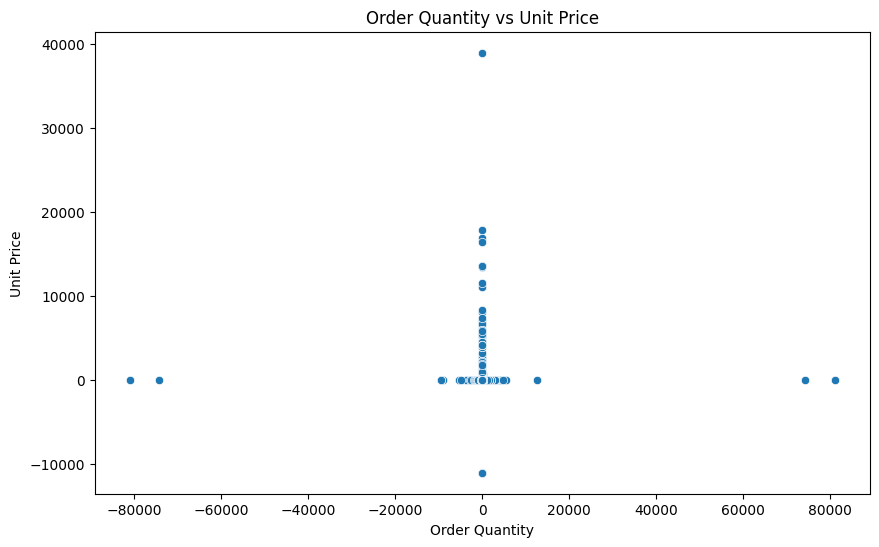

In [9]:
#Scatter plot of order quantity vs unit price
plt.figure(figsize=(10,6))
sns.scatterplot(x='quantity',y='unitprice',data=data)
plt.title('Order Quantity vs Unit Price')
plt.xlabel('Order Quantity')
plt.ylabel('Unit Price')
plt.show()

In [10]:
#Summary stat for categorical columns

data.describe(include='object').T

,count,unique,top,freq
invoiceno,541909,25900,573585,1114
stockcode,541909,4070,85123A,2313
description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
invoicedate,541909,23260,10/31/2011 14:41,1114
country,541909,38,United Kingdom,495478


In [11]:
data.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

Data Cleaning

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64


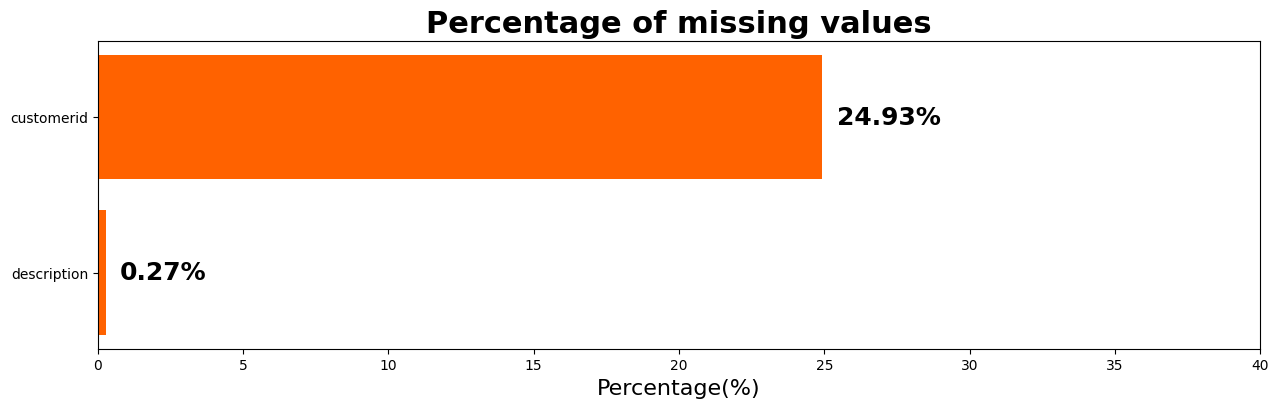

In [12]:
#calculating the percentage of missing values for each column

missing_data = data.isnull().sum()
print(missing_data)
missing_percentage = (missing_data[missing_data>0]/data.shape[0])*100

#prepare Values
missing_percentage.sort_values(ascending=True, inplace = True)

#plot the barh chart

fig,ax = plt.subplots(figsize=(15,4))
ax.barh(missing_percentage.index,missing_percentage,color='#ff6200')

#Annotate the values and indexes
for i,(value,name) in enumerate(zip(missing_percentage,missing_percentage.index)):
    ax.text(value+0.5,i,f"{value:.2f}%",ha='left',va='center',fontweight='bold',fontsize=18,color='black')

#in this loop:
    #
    #
    #

#Set X-axis limit
ax.set_xlim([0,40])

#Add label and title
plt.title('Percentage of missing values',fontweight='bold',fontsize=22)
plt.xlabel('Percentage(%)',fontsize=16)
plt.show()

In [13]:
#extracting rows with missing values in 'Customer ID ' or 'Description' columns
data[data['customerid'].isnull() | data['description'].isnull()].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [14]:
#removing rows with missing values in 'Customer ID' and 'Description'
data=data.dropna(subset=['description','customerid'])

In [15]:
data.shape

(406829, 8)

In [16]:
data.size

3254632

In [17]:
data.isnull().sum().sum()

0

In [18]:
#finding duplicate rows (keeping all instances)
duplicate_rows =data[data.duplicated(keep=False)]

#sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'])

#Displaying the first 10 records
duplicate_rows_sorted.head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [19]:
#removing duplicate rows
print(f'The dataset contains {data.duplicated().sum()} duplicate rows that need to be removed')

#removing duplicate rows
data.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed


In [20]:
#filterout the rows with Invoice No starting with 'C' and create a new column indicating the transaction status

data['transaction_status']=np.where(data['invoiceno'].astype(str).str.startswith('C'),'Cancelled','Completed')

#Analyze the characteristics of these rows (considering the new column)
cancelled_transaction=data[data['transaction_status']=='Cancelled']
print(cancelled_transaction.head())

cancelled_transaction.describe().drop('customerid',axis=1)

    invoiceno stockcode                       description  quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         invoicedate  unitprice  customerid         country transaction_status  
141   12/1/2010 9:41      27.50     14527.0  United Kingdom          Cancelled  
154   12/1/2010 9:49       4.65     15311.0  United Kingdom          Cancelled  
235  12/1/2010 10:24       1.65     17548.0  United Kingdom          Cancelled  
236  12/1/2010 10:24       0.29     17548.0  United Kingdom          Cancelled  
237  12/1/2010 10:24       0.29     17548.0  United Kingdom          Cancelled  


,quantity,unitprice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [21]:
#Finding the percentage of cancelled transactions
cancelled_percentage= (cancelled_transaction.shape[0]/data.shape[0])*100

#printing the percentage of cancelled transactions
print(f'The  percentage of cancelled trasactions in the dataset is:{cancelled_percentage:.2f}%')

The  percentage of cancelled trasactions in the dataset is:2.21%


In [22]:
#Finding the number of unique stock codes
unique_stock_codes=data['stockcode'].nunique()

#Printing the number of unique stock codes
print(f'The number of unique stock codes in the dataset is :{unique_stock_codes}')

The number of unique stock codes in the dataset is :3684


In [39]:
top_10_stock_codes

stockcode
85123A    0.516694
22423     0.473657
85099B    0.415107
47566     0.352303
84879     0.351552
20725     0.336790
22720     0.306263
22197     0.277739
23203     0.277238
20727     0.274986
Name: proportion, dtype: float64

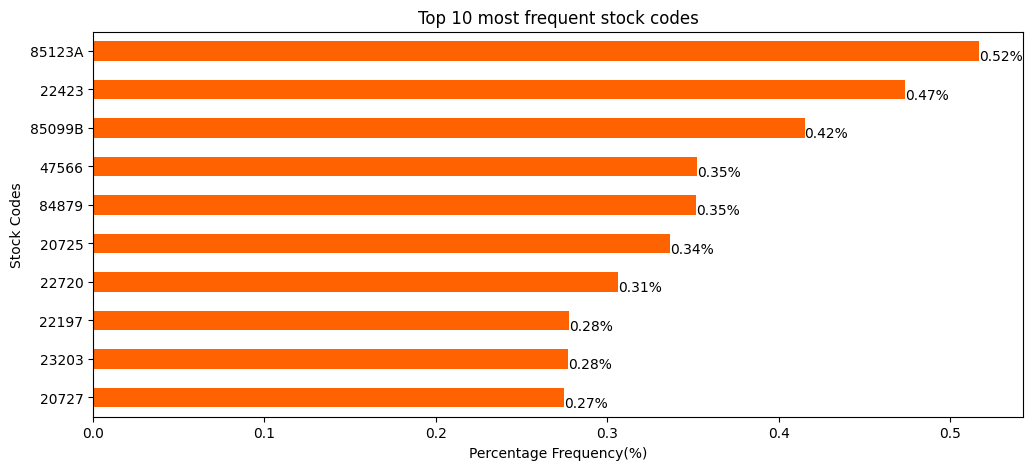

In [53]:
#Finding the top 10 most frequent stock codes
top_10_stock_codes = data['stockcode'].value_counts(normalize= True).head(10)*100

#plotting the top 10 most frequent stock codes

plt.figure(figsize=(12,5))
top_10_stock_codes.plot(kind = 'barh', color = '#ff6200')

#Adding the percentage frequency on the bars

for index,value in enumerate(top_10_stock_codes):
    plt.text(value,index+0.25,f'{value:.2f}%',fontsize=10)

plt.title('Top 10 most frequent stock codes')
plt.xlabel('Percentage Frequency(%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [24]:
#Finding the number of numeric characters in each unique stock codes
unique_stock_codes = data['stockcode'].unique()
numeric_char_counts_in_unique_codes=pd.Series(unique_stock_codes).apply(lambda x:sum(c.isdigit() for c in str(x))).value_counts()
                                                                        

#Printing the value counts for unique stock codes
print('the value counts of numeric character frequencies in unique stock codes:')
print('-'*70)
print(numeric_char_counts_in_unique_codes)

the value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


In [25]:
#Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes =[code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0,1)]

#printing each stock code on a new line
print('anmalous stock codes:')
print('-'*22)
for code in anomalous_stock_codes:
    print(code)

anmalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [26]:
#calculate percentage

In [27]:
#removing rows with anomalous stock codes from the dataset
data=data[~data['stockcode'].isin(anomalous_stock_codes)]

In [28]:
data.shape[0]

399689

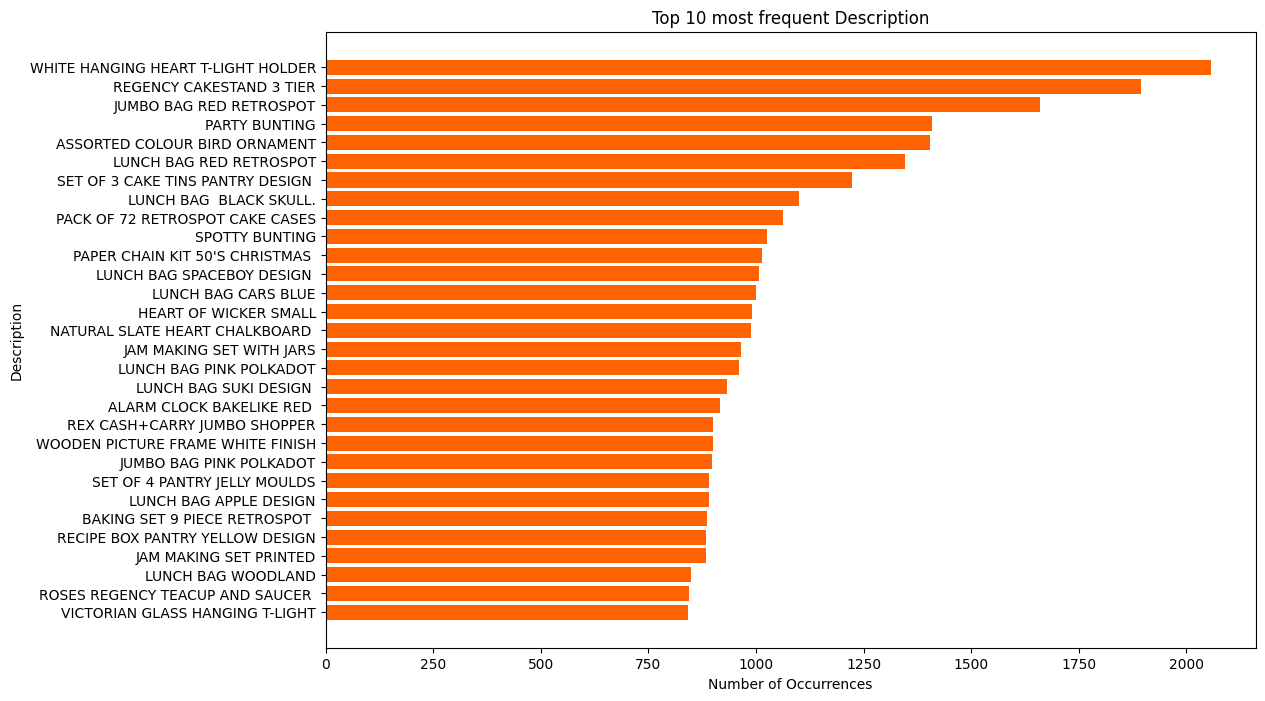

In [29]:
#calculate the occurence of each unique description and sort them
description_counts = data['description'].value_counts()

#get the top 30 description
top_30_descriptions = description_counts[:30]

#plotting
plt.figure(figsize = (12,8))
plt.barh(top_30_descriptions.index[::-1],top_30_descriptions.values[::-1],color='#ff6200')

#adding labels and title
plt.title('Top 10 most frequent Description')
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.show()

In [30]:
#Find unique descriptions containing lowercase characters
lowercase_descriptions = data['description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

#print the unique descriptions containing lowercase characters
print('The unique descriptions containing lower case characters are:')
print('-'*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lower case characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [31]:
#remove unnecessary description

In [32]:
data['unitprice'].describe()

count    399689.000000
mean          2.907457
std           4.451881
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: unitprice, dtype: float64

In [33]:
data[data['unitprice']==0].describe()[['quantity']]

,quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [34]:
#removing records with a unit price of zero to avoid potential data entry errors
data=data[data['unitprice']>0]

In [35]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,transaction_status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [36]:
#resetting index
data.reset_index(drop=True, inplace=True)

In [37]:
data.shape[0]

399656